# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, June 13, 2022 at 18:00**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

C:\Users\User\anaconda3\envs\cpsc330\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


> If you get a `FutureWarning` regarding `pandas.Int64Index`, you can ignore it. It is because of a [known issue in `xgboost`](https://github.com/dmlc/xgboost/issues/7593).

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.
- The maximum group size is 2.
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
train_df, test_df = train_test_split(
    df, test_size=0.3, random_state=123
)  
X_train, y_train = train_df.drop(columns =["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns =["default.payment.next.month"]), test_df["default.payment.next.month"]
print("train:", train_df.shape, "test:", test_df.shape)

train: (21000, 25) test: (9000, 25)


<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,47010.414095,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,69035.759516,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-157264.000000,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2663.750000,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20088.500000,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,59895.000000,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


`describe` shows the value statistical information of the data, for example, count, mean, std, min and etc. 

Values in different features scaled quite differently, for example ID and Age. Some data scaling could be done here. Features like SEX, Education, Marriage have very small range so these features can be converted into categorical values.

In [5]:
#finding unique value counts for each feature 
value_counts = []
feature_list = X_train.columns
for feature in feature_list:
    value_counts.append(X_train[feature].nunique())
print(value_counts)
print(feature_list)

[21000, 80, 2, 7, 4, 56, 11, 11, 11, 11, 10, 10, 16613, 16325, 16116, 15756, 15383, 15127, 6330, 6381, 6048, 5541, 5533, 5536]
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


Categorical features

    1. SEX -> binary encoding
    2. Education -> ordinal (already done in the data)
    3. Marriage -> one-hot encoding
    3. PAY_0-6 -> ordinal (some shifting could be useful)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         21000 non-null  int64  
 1   LIMIT_BAL  21000 non-null  float64
 2   SEX        21000 non-null  int64  
 3   EDUCATION  21000 non-null  int64  
 4   MARRIAGE   21000 non-null  int64  
 5   AGE        21000 non-null  int64  
 6   PAY_0      21000 non-null  int64  
 7   PAY_2      21000 non-null  int64  
 8   PAY_3      21000 non-null  int64  
 9   PAY_4      21000 non-null  int64  
 10  PAY_5      21000 non-null  int64  
 11  PAY_6      21000 non-null  int64  
 12  BILL_AMT1  21000 non-null  float64
 13  BILL_AMT2  21000 non-null  float64
 14  BILL_AMT3  21000 non-null  float64
 15  BILL_AMT4  21000 non-null  float64
 16  BILL_AMT5  21000 non-null  float64
 17  BILL_AMT6  21000 non-null  float64
 18  PAY_AMT1   21000 non-null  float64
 19  PAY_AMT2   21000 non-null  float64
 20  PA

`info` shows the not null counts and data type for each feature

Based from the statistical information provided above, all the data is non-null which might mean no imputation needed. 

In [7]:
y_train.value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

The above code shows the class distribution of the target. This is useful for deciding if using other metrics would be better for model selection.

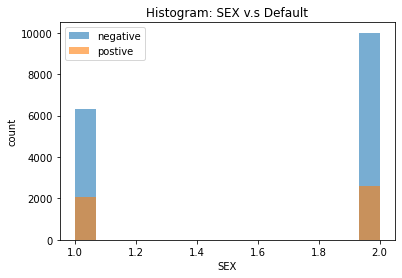

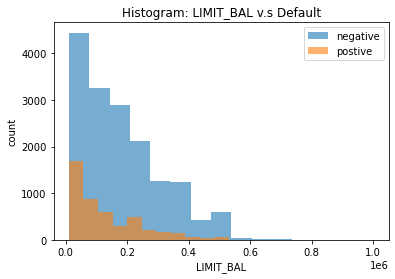

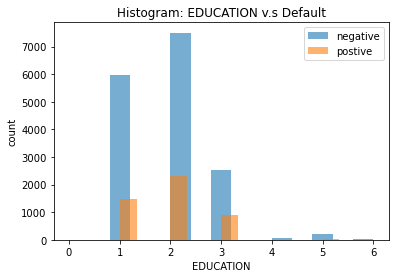

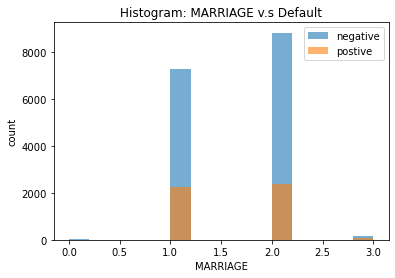

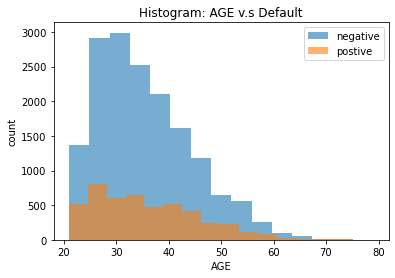

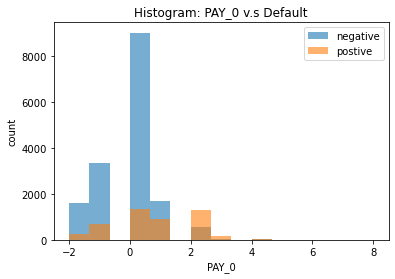

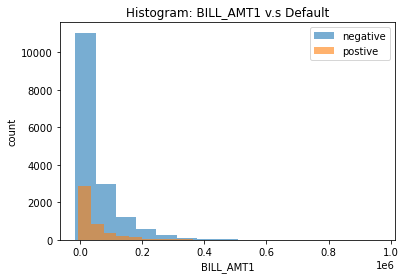

In [8]:
#get negative and positive classes from train set 
#relationship between features and classes.
#rename column name
train_set = train_df.copy()
train_set.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
positive_examples = train_set.query('default == 1')
negative_examples = train_set.query('default == 0')
features = ['SEX','LIMIT_BAL','EDUCATION','MARRIAGE','AGE','PAY_0','BILL_AMT1']
for feature in features:
    pos = positive_examples[feature]
    neg = negative_examples[feature]
    plt.hist(neg, bins=15, alpha = 0.6)
    plt.hist(pos, bins=15, alpha = 0.6)
    plt.ylabel("count")
    plt.xlabel(feature)
    plt.title("Histogram: " + feature + " v.s Default")
    plt.legend(['negative', 'postive'])
    plt.show()
    

Based on the histograms produced for different features, we can see that SEX, Marriage are not strong features for predicting the target class because both classes share similar distributions. Therefore, we might consider dropping these two. The graph distribution also shows data imbalance which means confusion matrix would be more informative in this case.

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [9]:
X_train = X_train.assign(MEAN_DIFF_BILL_AMT = (X_train["BILL_AMT6"] - X_train["BILL_AMT1"])/5)
X_train = X_train.assign(MEAN_DIFF_PAY_AMT = (X_train["PAY_AMT6"] - X_train["PAY_AMT1"])/5)

X_test = X_test.assign(MEAN_DIFF_BILL_AMT = (X_test["BILL_AMT6"] - X_test["BILL_AMT1"])/5)
X_test = X_test.assign(MEAN_DIFF_PAY_AMT = (X_test["PAY_AMT6"] - X_test["PAY_AMT1"])/5)

X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MEAN_DIFF_BILL_AMT,MEAN_DIFF_PAY_AMT
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,-5047.6,402.6
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,23418.6,10210.2
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,-10843.4,-400.8
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,-4154.6,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,428.2,359.2
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,1388.2,0.0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,-7637.0,-334.6
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,-2368.8,-400.0


<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [10]:
# shift PAY_# to start at 0
shifted_features = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in shifted_features:
    X_train[feature] += 2

# shift by -1 to start at 0
X_train['EDUCATION'] -=1

numeric_features = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MEAN_DIFF_BILL_AMT', 'MEAN_DIFF_PAY_AMT']
categorical_features = ['MARRIAGE']
binary_features = ['SEX']
passthrough = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] # already transformed
drop_feats = ['ID']

ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='if_binary', dtype=int), binary_features),
    (OneHotEncoder(), categorical_features),
    ("passthrough", passthrough),
    ('drop', drop_feats)
)

ct.fit(X_train)

ohe_columns = list(
    ct.named_transformers_["onehotencoder-2"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + binary_features + ohe_columns + passthrough

X_train_enc = pd.DataFrame(
    data=ct.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
16395,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,...,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
21448,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0
20034,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1438,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,...,0.0,1.0,0.0,1.0,3.0,4.0,2.0,2.0,2.0,2.0


<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [11]:
# code from lecture 5
dummy = DummyClassifier()
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
print(pd.DataFrame(scores).mean())

fit_time       0.002784
score_time     0.000799
test_score     0.776762
train_score    0.776762
dtype: float64


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [12]:
from sklearn.model_selection import cross_val_predict

model = LogisticRegression(max_iter=500)

scores = cross_validate(model, X_train_enc, y_train, return_train_score=True)
print(pd.DataFrame(scores).mean())

fit_time       0.189094
score_time     0.002393
test_score     0.809762
train_score    0.810214
dtype: float64


In [13]:
# code from lecture 7
scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}

for C in scores_dict["C"]:
    scores = cross_validate(LogisticRegression(C=C, max_iter=500), X_train_enc, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
print(results_df)

             C  mean_train_scores  mean_cv_scores
0       0.0001           0.780167        0.780190
1       0.0010           0.802036        0.802190
2       0.0100           0.808964        0.808286
3       0.1000           0.810155        0.809524
4       1.0000           0.810214        0.809762
5      10.0000           0.810238        0.809905
6     100.0000           0.810286        0.809857
7    1000.0000           0.810286        0.809905
8   10000.0000           0.810274        0.809905
9  100000.0000           0.810286        0.809952


Based from the result above, for C that is equal or larger than 1 will give the highest test score.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

models = {
    "Random Forest": RandomForestClassifier(random_state=123, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Tree": DecisionTreeClassifier(random_state=123)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=123)

model_data = []
for model in models:
    print("running: " + model)
    series = pd.DataFrame(cross_validate(models[model], X_train_enc, y_train, cv=kfold, return_train_score=True)).mean()
    series = series.reindex(index = ['model'] + list(set(series.index) - set('model')))
    series.at['model'] = model
    model_data.append(series)
pd.DataFrame(model_data)

running: Random Forest
running: KNN
running: Tree


,model,train_score,score_time,test_score,fit_time
0,Random Forest,0.995798,0.038647,0.811810,5.775383
1,KNN,0.843155,0.357865,0.794905,0.004388
2,Tree,0.995821,0.001996,0.725143,3.120914


Yes, both random forest beats logistic regression.

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector

best_models = []
for model in models: 
    print("Forward selecting: " + model)
    pipe_forward = make_pipeline(
        SequentialFeatureSelector(LogisticRegression(max_iter=500), n_features_to_select='auto'),
        models[model],
    )
    
    series = pd.DataFrame(cross_validate(pipe_forward, X_train_enc, y_train, return_train_score=True, cv=kfold)).mean()
    series = series.reindex(index = ['model'] + list(set(series.index) - set('model')))
    series.at['model'] = model
    best_models.append(series)
pd.DataFrame(best_models)

Forward selecting: Random Forest
Forward selecting: KNN
Forward selecting: Tree


,model,train_score,score_time,test_score,fit_time
0,Random Forest,0.991536,0.039943,0.811857,40.751836
1,KNN,0.838881,0.401775,0.791714,38.810017
2,Tree,0.991560,0.002998,0.713905,40.127054


Using forward selection with default params returned worse-performing or marginally better models. As such, all features will be kept for future models.

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [16]:
from scipy.stats import loguniform

param_grid = {"Random Forest": {"max_depth": np.arange(3, 8)},
              "KNN": {"n_neighbors": np.arange(3, 8)},
              "Tree": {"max_depth": np.arange(3, 8)}}

model_params = {}
for model in param_grid:
    print("tuning: " + model)
    random_search = GridSearchCV(
        models[model], param_grid=param_grid[model], n_jobs=-1, cv=kfold
    )
    
    random_search.fit(X_train_enc, y_train)

    model_params[model] = {"best_score": random_search.best_score_, "params": random_search.best_params_}
print(pd.DataFrame(model_params))

tuning: Random Forest
tuning: KNN
tuning: Tree
               Random Forest                 KNN              Tree
best_score          0.818857            0.805238          0.818571
params      {'max_depth': 7}  {'n_neighbors': 6}  {'max_depth': 3}


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [17]:
import shap

model = RandomForestClassifier(max_depth=7, random_state=123, n_jobs=-1)

model.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer.shap_values(X_train_enc)
values = np.abs(train_shap_values[1]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
).head(10)

C:\Users\User\anaconda3\envs\cpsc330\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,SHAP
PAY_0,0.052917
PAY_2,0.034379
PAY_3,0.017238
PAY_4,0.016333
PAY_AMT1,0.011887
PAY_6,0.011770
PAY_AMT2,0.010547
PAY_5,0.009566
PAY_AMT3,0.008177
PAY_AMT4,0.007387


This seems to imply that the most important features is on both the payment status (`PAY_#` features) or payment amount (`PAY_AMT#` features).

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [18]:
X_test_enc = pd.DataFrame(
    data=ct.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

model.score(X_test_enc, y_test)

0.786

These values are worse than validation but not to a degree that I find problematic. I don't think there is an issue of optimization bias.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

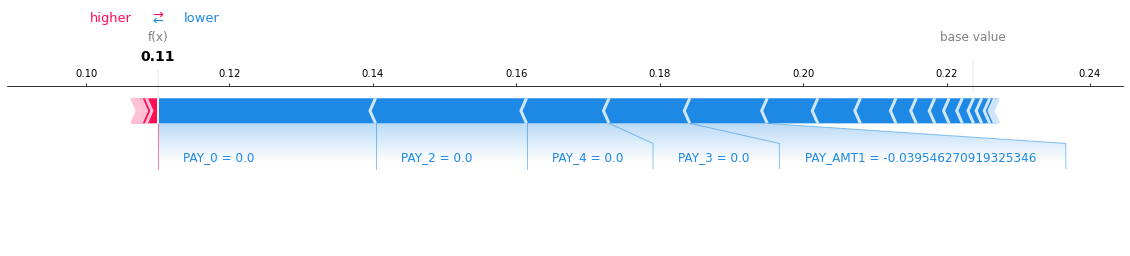

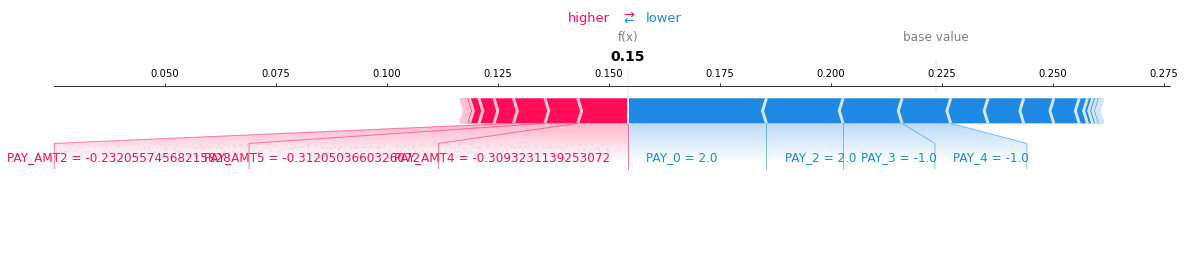

In [19]:
# code from lecture 12

no_indices, yes_indices = y_test.reset_index().groupby('default.payment.next.month').indices.values()

ex_no_index = no_indices[10]
ex_yes_index = yes_indices[10]

test_shap_values = explainer.shap_values(X_test_enc)

shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=test_shap_values[1][ex_no_index, :],
    features=X_test_enc.iloc[ex_no_index, :],
    matplotlib=True,
)
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=test_shap_values[1][ex_yes_index, :],
    features=X_test_enc.iloc[ex_yes_index, :],
    matplotlib=True,
)

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

1. The final test score is 0.786 for accuracy. Accuracy was used as the metric as we believed recall was too risk adverse and precision too risky.
2. The decision tree model is not the most accurate. Our engineered features were not important according to SHAP scores. We decided against using logreg, ridge, or svm as all said models took too long to train given the feature amount.
3. Trying the other ensemble methods would probably yield better results. Using larger ranges and more hyperparameters for tuning the models. 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 